# The Finite Difference Method
Sean Wade

A **finite difference** for a function $f(x)$ is an expression of the form $f(x+s)-f(x+t)$.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn
from __future__ import division

In [2]:
%matplotlib inline

## Problem 1

In [93]:
def u(x): return np.sin((x + np.pi)**2 - 1)

def prob1(f, a, b, N):
    x = np.linspace(a, b, N+1)
    diags = np.array([np.ones(N+1) * -1, np.ones(N+1)])
    h = np.float(b-a) / N
    pos = [0, 2]
    M = sp.sparse.spdiags(diags, pos, N-1, N+1).todense()
    u_prime = (1./(2*h)) * M.dot(f(x))


    diag = np.array([np.ones(N+1), np.ones(N+1)*-2, np.ones(N+1)])
    pos = [0, 1, 2]
    M2 = sp.sparse.spdiags(diag, pos, N-1, N+1).todense()
    u_double_prime = (1./h**2) * M2.dot( f(x))
    return 1/2 * u_double_prime - u_prime

prob1(u, 0, 1, 10)

matrix([[  6.90335739,  18.4812328 ,  23.28979198,  17.49835925,
           1.96742981, -16.69693491, -28.34068466, -24.63629149,
          -5.17040117]])

## Problem 2

In [59]:
def problem2(f, eps=1/10., alpha=1, beta=3, N=1000):
    a0, b0 = 0, 1
    x_array = np.linspace(a0,b0,N+1)
    h = np.abs((1-0)/N)
    A = (1/h**2)*((np.diag([-2*eps]*(N-1)) + np.diag([eps-h/2.]*(N-2), k=1) + np.diag([eps+h/2]*(N-2), k=-1)))
    b = f(x_array[1:N])
    C = np.zeros(len(b))
    C[0] = alpha*((eps+h/2.)/h**2)
    C[-1] = beta*((eps-h/2.)/h**2)
    b -= C
    return x_array[1:N], la.solve(A, b)

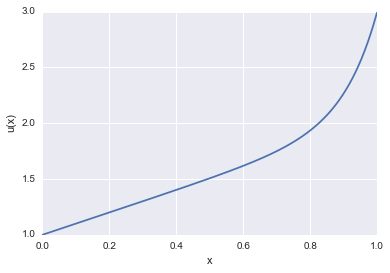

In [60]:
def f(x): return -1.
f = np.vectorize(f)
X, Y = problem2(f, eps=1/10, alpha=1, beta=3, N=1000)
plt.plot(X, Y)
plt.xlabel("x"); plt.ylabel("u(x)")
plt.show()

## Problem 3

In [75]:
def BVP(f, epsilon=1/10., alpha=1, beta=3, N=1000):
    a0, b0 = 0, 1
    points = np.linspace(a0,b0,N+1)
    h = np.float(b0-a0)/N
    diag_rows = np.array([np.ones(N-1) * (epsilon + h/2.),
                          np.ones(N-1)*-2 * epsilon,
                          np.ones(N-1) * (epsilon - h/2.)])
    positions = [-1, 0, 1]
    M = sp.sparse.spdiags(diag_rows, positions, N-1, N-1).todense()
    insert = f(points)
    insert2 = insert[1:-1]
    insert2[0] -= 1 * (epsilon + h/2.)/h**2
    insert2[-1] -= 3 * (epsilon - h/2.) / h**2
    system = np.linalg.solve((1./h**2)*M, insert2)
    system = np.append(1., system)
    system = np.append(system, 3.)
    return points, system

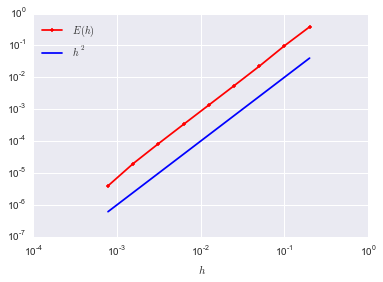

The order of the finite difference approximation is about  2.07031940493 .


In [76]:
num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)
# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
_, num_sol_best = BVP(f, epsilon=.1, alpha=1, beta=3, N=N[-1])
for j in range(len(N)-1):
    _, num_sol = BVP(f, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs( num_sol - num_sol_best[::2**(num_approx-j-1)] ))
plt.loglog(h,max_error, ".-r" ,label=" $ E(h) $ ")
plt.loglog(h,h**(2.), color = "blue" ,label=" $ h^{\, 2} $ ")
plt.xlabel(" $h$ ")
plt.legend(loc='best')
plt.show()
print "The order of the finite difference approximation is about ", ( (np.log(max_error[0]) -np.log(max_error[-1]) )/( np.log(h[0]) - np.log(h[-1]) ) ), "."

## Problem 4

In [77]:
def generalBVP(f, a, b, alpha, beta, a1, a2, a3, N):
    points = np.linspace(a,b,N+1)[1:-1]
    h = np.float(b-a) / N
    
    R = a1(points) / h**2 - a2(points) / (2*h)
    S = (-2 * a1(points))/h**2 + a3(points)
    T = a1(points)/h**2 + a2(points)/(2*h)
    
    diags = np.array([R,S,T])
    pos = [-1, 0, 1]
    D = np.zeros((N-1, N-1)) + np.diag(R[1:], -1) + np.diag(S, 0) + np.diag(T[:-1], 1)
    I = f(points)
    I2 = I
    I2[0] -= (alpha * (a1(points[0])/h**2 - a2(points[0])/(2*h)))
    I2[-1] -= (beta * T[-1])
    system = np.linalg.solve(D, I2)
    system = np.append(0, system)
    system = np.append(system, 1)
    return system

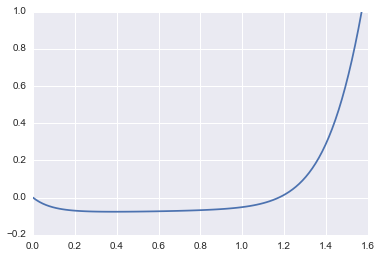

In [86]:
def f(x): return np.cos(x)
def a1(x): return x * 0 + .1
def a2(x): return x * 0
def a3(x): return -4*(np.pi - x**2)

N = 100
y = generalBVP(f, 0, np.pi/2, 0, 1, a1, a2, a3, N)
x = np.linspace(0, np.pi/2, N+1)
plt.plot(x, y)
plt.show()

## Problem 5

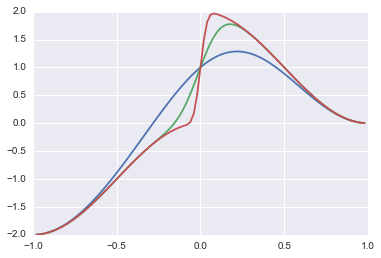

In [85]:
N = 100
eps_list = [ .1, .01, .001]
for epsilon in eps_list:
    
    # Define functions
    def f(x): return -1 *epsilon * np.pi**2*np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)
    def a1(x): return x * 0 + epsilon
    def a2(x): return x
    def a3(x): return x * 0
    
    y = generalBVP(f, -1, 1, -2, 0, a1, a2, a3, N)
    x = np.linspace(-1, 1, N+1)
    plt.plot(x[1:-1], y[1:-1])
    
plt.show()

## Problem 6

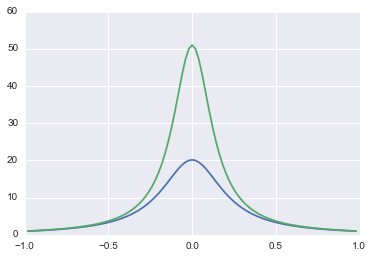

In [84]:
N = 100
eps_list = [ .05, .02]
for epsilon in eps_list:
    
    def f(x): return x * 0
    def a1(x): return (x**2 + epsilon)
    def a2(x): return 4*x
    def a3(x): return x * 0 + 2.
    
    y = BVPbest(f, -1, 1, 1/(1+epsilon), 1/(1+epsilon), a1, a2, a3, N)
    x = np.linspace(-1, 1.,N+1)
    plt.plot(x[1:-1], y[1:-1])
    
plt.show()